In [33]:
import numpy as np                  # Mathetimatical Operations
import pandas as pd                 # Data manipulation

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt     
%matplotlib inline

# Datetime
import datetime 
import time
from datetime import datetime

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Import the data 

df = pd.read_csv("shop_data.csv")

In [35]:
# Check for the first 5 values
df.head()

,Unnamed: 0,Unnamed: 0.1,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,0,0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59
1,1,1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59
2,2,2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99
3,3,3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99
4,4,4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38


In [36]:
# Remove the redundant columns

df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1)

In [37]:
# Number of unique id's in the dataset

print("Total unique id's are: ", df['id'].nunique())

Total unique id's are:  1215


In [38]:
# Number of unique id's in the dataset

print("Total unique id's are: ", df['id'].unique())

Total unique id's are:  [   86246    86252 12262064 ... 97781522 97782380 97795325]


In [39]:
# Check the total number of observation in the dataframe
print("Number of rows ", df.shape[0])
print("Number of columns ", df.shape[1])

Number of rows  1150000
Number of columns  11


### Question 1. Create a column in the dataframe that shows how much each customer spends per visit (per day).

In [40]:
# Create a column for the total amount spent

df['total_amount'] = df['purchaseamount']*df['purchasequantity']

In [41]:
grp = df.groupby(['id','date'],as_index=False).sum()

In [42]:
grp = grp[['id','date','total_amount']]

In [43]:
# Merge the current dataframe to the original dataframe 
df_q1 = df.merge(grp, how='left', on=['id','date'])
df_q1.columns = ['id', 'chain', 'dept', 'category', 'company', 'brand', 'date',
       'productsize', 'productmeasure', 'purchasequantity', 'purchaseamount',
       'total_amount', 'spending_per_day']
df_q1.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,total_amount,spending_per_day
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59,7.59,268.9
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59,1.59,268.9
2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99,5.99,268.9
3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99,1.99,268.9
4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38,20.76,268.9


### Question 2. Create a column that shows the number of previous visits per customer.

In [44]:
df_q2 = df[['id', 'date']]
df_q2['count'] = np.repeat(1,df_q2.shape[0])
df_q2 = df_q2.groupby(['id','date'], as_index = False).count()
# We will again group by the id and get a cumulative count on the dates
df_q2['Number_previous_visits'] = df_q2.groupby(['id'])['date'].cumcount()
df_q2 = df_q2.drop(columns = ['count'])

In [45]:
# Lets merge the grouped information with the original data
df_q2 = df_q1.merge(df_q2, how = 'left', on = ['id', 'date'])
df_q2.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,total_amount,spending_per_day,Number_previous_visits
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59,7.59,268.9,0
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59,1.59,268.9,0
2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99,5.99,268.9,0
3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99,1.99,268.9,0
4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38,20.76,268.9,0


### Question 3. Referencing the previous question, write a SQL query that would return the same result.

In [46]:
'''
SELECT *
FROM df

LEFT JOIN(

SELECT tableA.id, tableA.date, 
    ROW_NUMBER() OVER (PARTITION BY tableA.id ORDER BY tableA.date) AS Number_previous_visits
FROM
    (SELECT id, date, count(date) AS count_df
    FROM df
    GROUP BY id, date) tableA)

ON df.id = tableA.id AND df.date = tableA.date

'''

'\nSELECT *\nFROM df\n\nLEFT JOIN(\n\nSELECT tableA.id, tableA.date, \n    ROW_NUMBER() OVER (PARTITION BY tableA.id ORDER BY tableA.date) AS Number_previous_visits\nFROM\n    (SELECT id, date, count(date) AS count_df\n    FROM df\n    GROUP BY id, date) tableA)\n\nON df.id = tableA.id AND df.date = tableA.date\n\n'

### Question 4. Create a column that shows the cumulative count (rolling sum) of previous purchases (per customer) that took place in department 99.

In [47]:
# Note: Here I am assuming that by cumulative count (rolling sum), I have to calculate the rolling sum of total amount 
#       of money that the customer spends


# Subsetting the data and taking values with dept id = 99
df_q4 = df[df['dept']==99]
# Grouping the data by id and date
df_q4 = df_q4.groupby(['id','date'],as_index=False).sum()
# Tkaing only id, date and total amount column
df_q4 = df_q4[['id','date','total_amount']]

In [48]:
df_q4['rolling'] = df_q4.groupby(['id'])['total_amount'].cumsum()

In [49]:
df_q4.head(10)

,id,date,total_amount,rolling
0,86246,2012-03-02,2.49,2.49
1,86246,2012-03-16,2.19,4.68
2,86246,2012-03-17,18.25,22.93
3,86246,2012-03-18,8.58,31.51
4,86246,2012-03-21,14.24,45.75
5,86246,2012-03-22,5.08,50.83
6,86246,2012-03-24,3.29,54.12
7,86246,2012-03-25,6.18,60.30
8,86246,2012-03-31,9.28,69.58
9,86246,2012-04-01,1.49,71.07


### Question 5. Create a histogram that shows the distinct visits per customer. A distinct visit is defined as a customer visiting the store on two separate days.

In [50]:
df_q5 = df.groupby(['id','date'],as_index=False).sum()

In [51]:
df_q55 = df_q5.groupby('id').count()

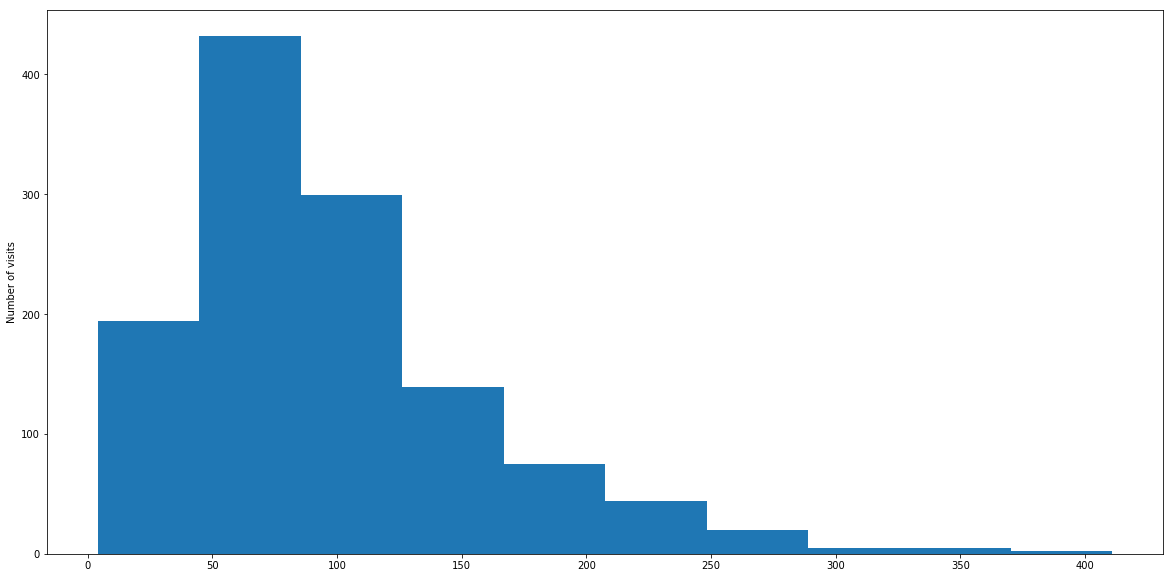

In [52]:
plt.figure(figsize=(20,10))
plt.hist(df_q55['date'])
plt.ylabel("Number of visits")
plt.show()

### Question 6. Plot the distribution of days between visits, per customer. For example, if a customer comes in on 1/1/2019 and again on 1/3/2019, the days between visits equals 2 days.

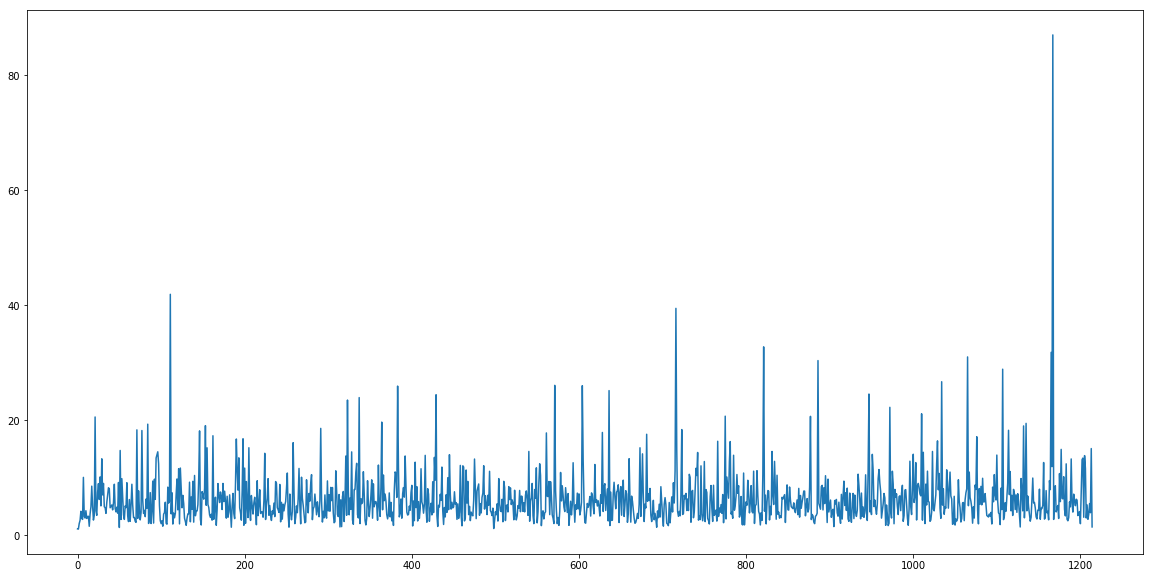

In [53]:
df['date']=pd.to_datetime(df['date'])
df_temp = df.groupby(['id','date'],as_index=False).sum()
df_temp['date']=pd.to_datetime(df_temp['date'])

df_q6 = df_temp[['id', 'date']]
df_q6['previous_visit'] = df_q6.groupby(['id'], as_index = False)['date'].shift(1)['date']
df_q6['lag'] = (df_q6['date'] - df_q6['previous_visit']).dt.days

plt.figure(figsize=(20,10))
plt.plot(df_q6.groupby('id', as_index = False)['lag'].mean()['lag'])

### Question 7. Write a function that “looks into the future” and creates a Boolean column in your dataframe. The column will have a value of 1 if the customer comes in to the store (and completes a purchase) within the next five days, 0 otherwise.

In [54]:
def future(df):
    df['date'] = pd.to_datetime(df['date'])
    # Lets first remove the values where purchase quantity is less than 1
    df = df[df['purchasequantity'] >= 1]
    # Group the data by id and date
    dataframe = df.groupby(['id','date'],as_index=False).sum()
    # shift the date column by 1 and take the difference. When the difference is less than equal to 5 --> give 1 value
    dataframe['future_value'] = (dataframe.groupby('id')['date'].shift(-1) - dataframe['date']).dt.days <= 5
    dataframe['future_value'] = np.where(dataframe['future_value'] == True,1,0)
    return dataframe

In [55]:
df_q7 = df_q2.merge(future(df_q2)[['id','date','future_value']], how='left', on=['id','date'])

In [56]:
df_q7.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,total_amount,spending_per_day,Number_previous_visits,future_value
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59,7.59,268.9,0,1.0
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59,1.59,268.9,0,1.0
2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99,5.99,268.9,0,1.0
3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99,1.99,268.9,0,1.0
4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38,20.76,268.9,0,1.0


### Question 8. Plot the distribution of how much customers spend per day.

In [57]:
df_q8 = df.groupby('date').sum()

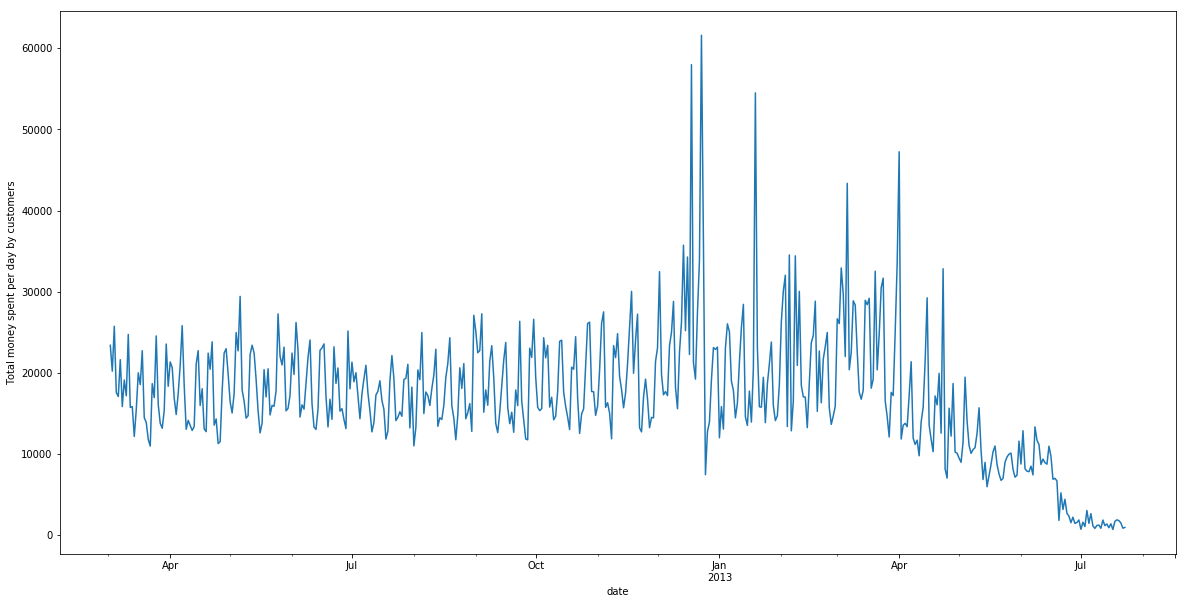

In [58]:
plt.figure(figsize=(20,10))
df_q8['total_amount'].plot()
plt.ylabel('Total money spent per day by customers')
plt.show()

### Question 9. Which customer(s) has the highest number of consecutive shopping days?

In [59]:
df = df.groupby(['id','date'],as_index=False).sum()
df['date'] = pd.to_datetime(df['date'])

In [60]:
s = df.groupby('id').date.diff().dt.days.fillna(1).ne(1).cumsum()
df_q9 = df.groupby(['id', s]).size().reset_index(level=1, drop=True)

In [61]:
print("Customer with id:",df_q9.idxmax() , "has the highest number of consecutive shopping days")

Customer with id: 86252 has the highest number of consecutive shopping days


### Question 10. On average how often do customers come in per month?

In [62]:
df_q10 = df

In [63]:
df_q10.head()

,id,date,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount,total_amount
0,86246,2012-03-02,10660,2256,226559,12893765502,795572,1878.40,58,210.51,268.90
1,86246,2012-03-03,1435,392,39244,719419968,117453,73.75,8,47.59,57.13
2,86246,2012-03-04,2460,404,40520,1252057702,176237,124.25,15,32.38,37.34
3,86246,2012-03-05,1230,246,24749,637323784,63904,310.55,11,34.99,90.67
4,86246,2012-03-06,9020,1752,175830,11059816428,451070,602.61,66,182.33,399.08


In [64]:
df_q10['date'] = pd.to_datetime(df_q10['date'])

In [65]:
df_q10['month'] = df_q10['date'].dt.month
df_q10['year'] = df_q10['date'].dt.year

In [66]:
df_q10.head()

,id,date,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount,total_amount,month,year
0,86246,2012-03-02,10660,2256,226559,12893765502,795572,1878.40,58,210.51,268.90,3,2012
1,86246,2012-03-03,1435,392,39244,719419968,117453,73.75,8,47.59,57.13,3,2012
2,86246,2012-03-04,2460,404,40520,1252057702,176237,124.25,15,32.38,37.34,3,2012
3,86246,2012-03-05,1230,246,24749,637323784,63904,310.55,11,34.99,90.67,3,2012
4,86246,2012-03-06,9020,1752,175830,11059816428,451070,602.61,66,182.33,399.08,3,2012


In [83]:
df_check = df

df_check['date'] = pd.to_datetime(df_check['date'])
df_check['month'] = df_check['date'].dt.month
df_check['year'] = df_check['date'].dt.year
df_check[(df['year'] == 2012) & (df['month'] == 3)].shape

(7304, 13)

In [67]:
df_q10 = df_q10.groupby(['year','month']).count()

In [70]:
print("On average,", round(df_q10['id'].mean()) ,"customers visit the store per month")

On average, 6954 customers visit the store per month


### Question 11. Plot the average dollar amount spend per month?

In [88]:
df_q11 = df

df_q11['date'] = pd.to_datetime(df_q11['date'])

df_q11['month'] = df_q11['date'].dt.month
df_q11['year'] = df_q11['date'].dt.year
df_q11 = df_q11.groupby(['year','month']).mean()

Text(0.5, 0, 'Month')

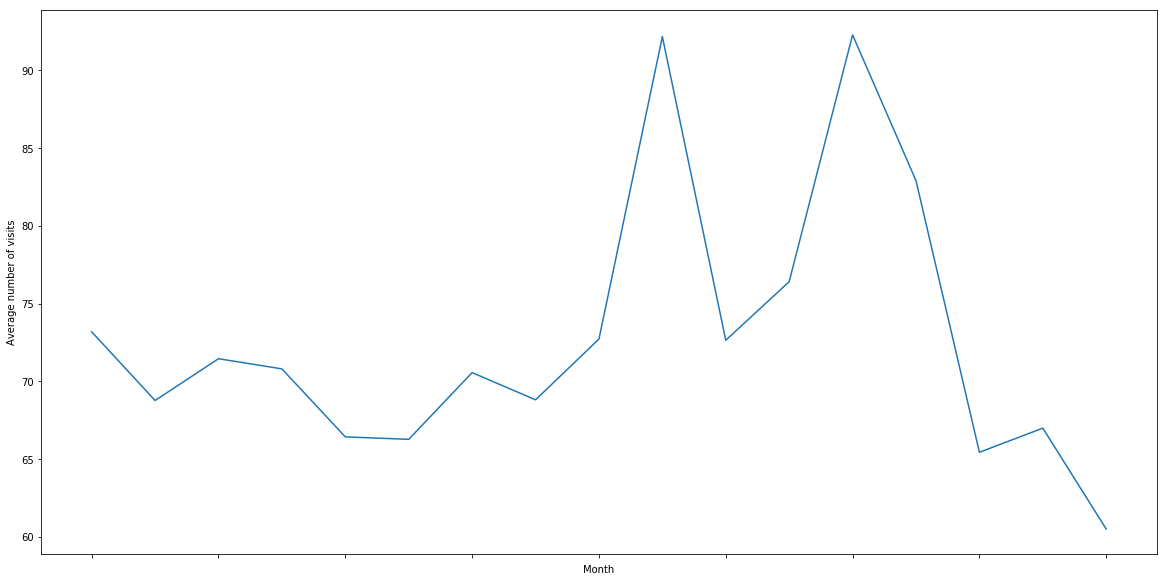

In [76]:
# plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
df_q11['total_amount'].plot()
plt.ylabel("Average number of visits")
plt.xlabel("Month")

### Question 12. By this point you've done enough EDA to have a decent understanding of the data you are working with. Without writing any code, please explain below how you would build a useful model around this data.

#### 1.  What other data do you wish you could have had access to?

Apart from the above data, I wish I could have had access to: 

a. Data about how many products were sold online and how many were sold offline. 

Reason: How sensitive are people's buying pattern to picking up at store vs delivery. Answer to this will help us understand that can we increase our sales if we start expanding our delivery operations and more importantly we would be able to quantify the gains from undertaking such an exercise. 

b. What was the discount offered for each product at any point of time. 

Reason: What we are trying to understand is price sensitivity of individual users towards different products by understanding how they respond to different discounting schemes. This will help us design customized offers. Also, it will help us come up with better group discounts (Eg. Designing a custom package for cleaning utilities)

c. Data about the placements of the product in the store. We can try to find out the products that are sold together and place them together (Associative rule mining) so that we can take the advantage of sales correlation. Eg. Will it increase the sales of bread if places closer to milk and egg. For each product, we would identify placement strategies based on consumption patterns instead of categorization by product types. 



#### 2. In your opinion, what would the company holding this data care about?

a. Maximizing the revenue 

b. Gauging and increasing customer satisfaction

#### 3. What would be your target variable (label)?

What is the amount that the customer spends.  

#### 4. What machine learning algorithm would you implement and why?

a. Time Series (ARIMA or Neural Network): As this is a time series data, we can use ARIMA modeling/Neural Network to forecast the amount that the customer will spend in a particular month 

b. Clustering: For different kinds of segmentation (Products, customers) 

#### 5. What type of visualization would be helpful?



a. ACF/PACF plot

b. Low dimensional embeddings based visualization (t-SNE)

c. Cluster plot